In [11]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages # A reducer function
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from pydantic import BaseModel
from dotenv import load_dotenv
from typing import Annotated
from databricks_langchain import ChatDatabricks
import os
from client import AzureAIClient
from IPython.display import Image, display
import gradio as gr

c:\Users\edan\repos\personal_projects\AI\Agentic_AI_Projects\langgraph_sidekick\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
load_dotenv(override=True)

True

In [13]:
# Create a simple state
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [14]:
# Get llms
llm_db = ChatDatabricks(endpoint="databricks-claude-3-7-sonnet", max_tokens=1000)

llm_az = AzureChatOpenAI(
    api_version="2024-10-21",
    azure_ad_token_provider=AzureAIClient().token_provider,
    azure_deployment="gpt-4o"
)

2025-07-05 18:34:51.342 | SUCCESS  | client:_get_token_provider:44 - Successfully initialized Azure Credentials!!


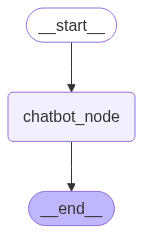

In [15]:
# Build a graph
graph_builder = StateGraph(state_schema=State)

# Create node
def chatbot_node(old_state: State) -> State:
    response = llm_db.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot_node", chatbot_node)

# Create Edges
graph_builder.add_edge(START, "chatbot_node")
graph_builder.add_edge("chatbot_node", END)

# Create the graph
graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Create a simple chat interface using gradio
def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={}, id='9f0a53f1-a8fb-4357-9964-ae23da3ae999'), AIMessage(content="Hello! How can I assist you today? I'm here to help with any questions or tasks you might have.", additional_kwargs={}, response_metadata={'model': 'eu.anthropic.claude-3-7-sonnet-20250219-v1:0', 'usage': {'prompt_tokens': 9, 'completion_tokens': 26, 'total_tokens': 35}, 'object': 'chat.completion', 'id': 'msg_bdrk_01BhCaodb3KuqwNtsMMSVFcn', 'created': 1751726126, 'model_name': 'eu.anthropic.claude-3-7-sonnet-20250219-v1:0'}, id='run--c1eb845d-f95a-41ba-bf67-f392c6d76ebb-0')]}
{'messages': [HumanMessage(content='Do you work properly ?', additional_kwargs={}, response_metadata={}, id='558a42b7-80c5-45ab-9574-472b06795895'), AIMessage(content="Yes, I'm working properly. I'm designed to be helpful, harmless, and honest in my interactions. I can answer questions, provide information, engage in conversation, and assist with various tasks w

In [5]:
# Get a nice googler serper fucntion
from langchain_community.utilities import GoogleSerperAPIWrapper

serper = GoogleSerperAPIWrapper()
serper.run("What is the current date?")

ValidationError: 1 validation error for GoogleSerperAPIWrapper
  Value error, Did not find serper_api_key, please add an environment variable `SERPER_API_KEY` which contains it, or pass `serper_api_key` as a named parameter. [type=value_error, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error